In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the dataset
import pandas as pd
import zipfile
import io
import requests

# Step 1: Download and extract the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

In [4]:
# Extract specific file
file_name = 'bank-additional/bank-additional-full.csv'
with zip_file.open(file_name) as file:
    df = pd.read_csv(file, sep=';')

In [5]:
# Step 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
# Split the dataset into features and target variable
X = df.drop(columns=['y'])
y = df['y']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Step 3: Feature Selection
# (For simplicity, we'll use all features in this case)

# Step 4: Model Building
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Step 5: Model Evaluation
y_pred = dt_classifier.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8892935178441369
Confusion Matrix:
 [[10275   693]
 [  675   714]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



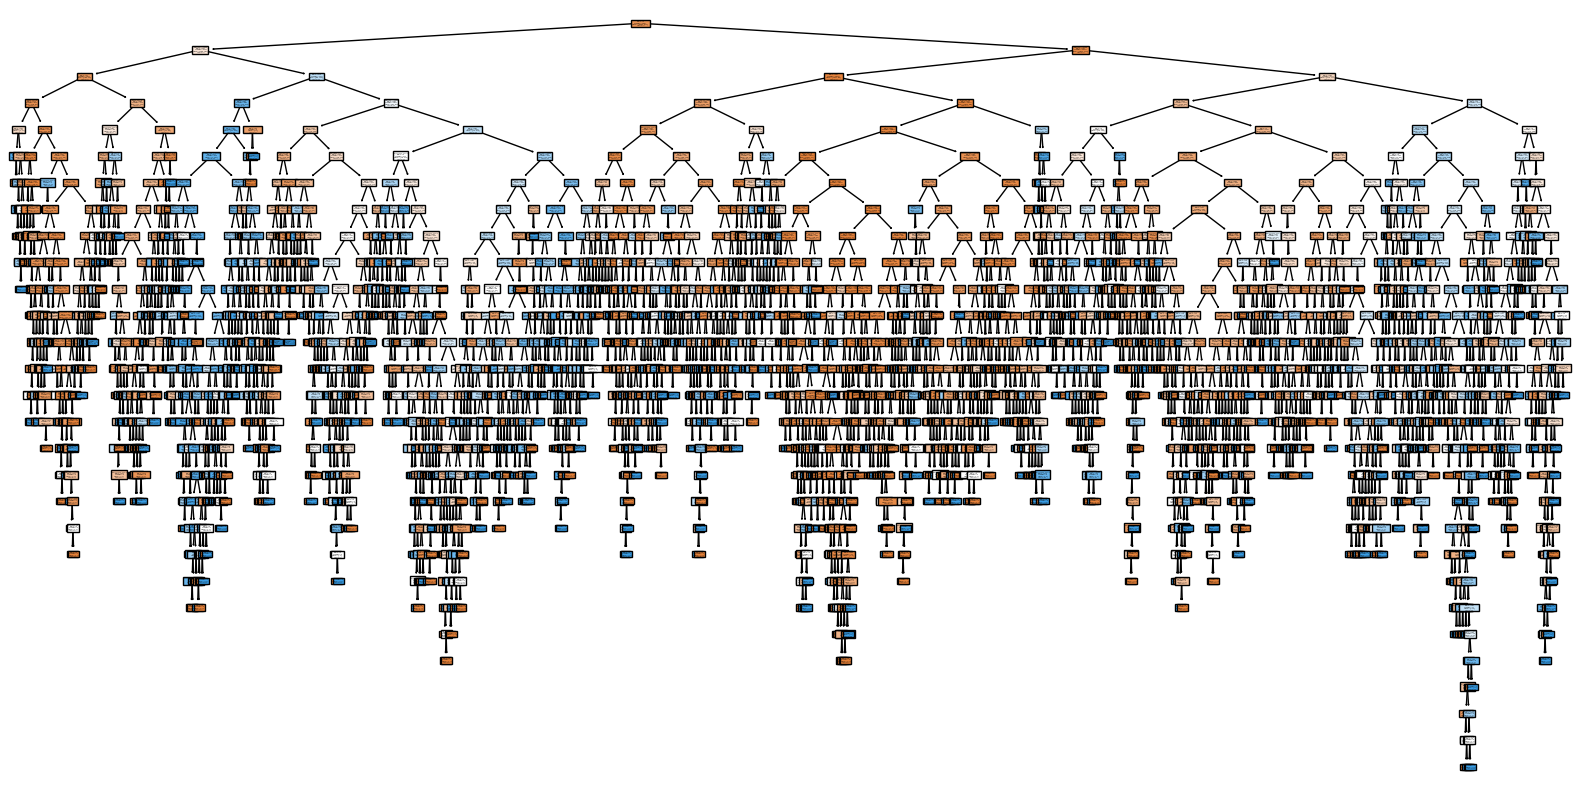

In [11]:
# Step 6: Visualization of the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.show()